### 정상성에 대해서 알려면 정상성인지 아닌지 봐야됨
* 자기 상관함수(ACF)값이 작아야 정상성을 갖고 있는것.
* 장기상관성 = 시차 0이면 자기상관계수 항상1 자기자신이므로
* 0에 가까워지는 속도가 높을수록 정상성임.(그래서 차분을 이용)
* 정상성이 보이는 그래프는 꾸준히(추세) 변하면 안됨, 계절성을 보이면 안됨,순환도 안해야함.
* 분포가 고른데이터를 가지고 적용시켜야

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path= 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv' 
df=pd.read_csv(file_path,parse_dates=['date'],index_col='date')
df.head(12)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


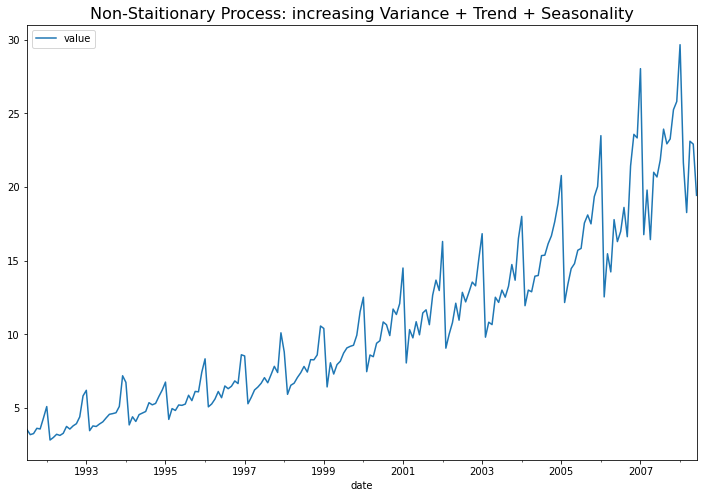

In [6]:
df.plot(figsize=[12,8])
plt.title('Non-Staitionary Process: increasing Variance + Trend + Seasonality',fontsize=16)
plt.show()


### 자기상관성 보여주기

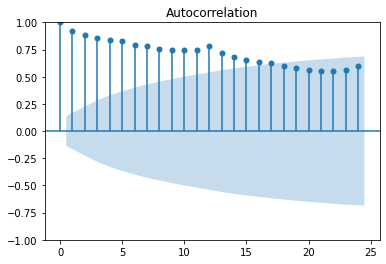

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plot_acf(df) # 굉장히 정상성이 없음

###  편자기상관성 보여주기

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


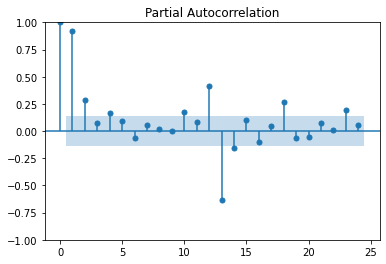

In [22]:
fig=plot_pacf(df) # 편자기도 굉장히 강함

In [7]:
# Variance Stabilizing Transformation(VST) by Taking Logarithm
df_vst=np.log(df.value)
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

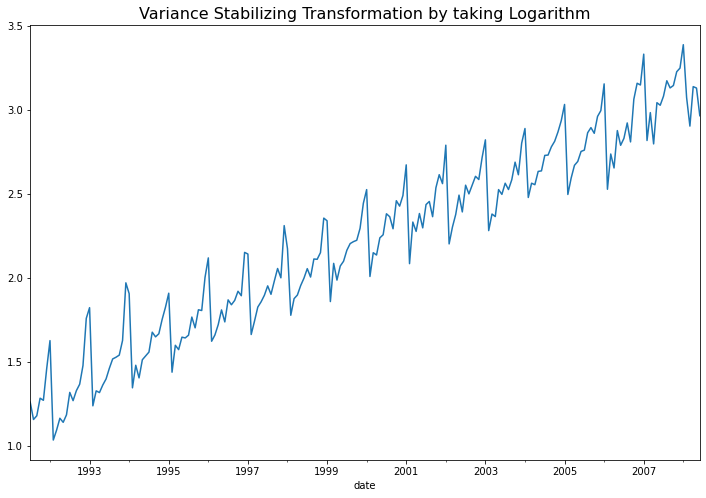

In [8]:
# plotting
df_vst.plot(figsize=(12,8))
plt.title("Variance Stabilizing Transformation by taking Logarithm",fontsize=16)
plt.show()

#### 로그 후 자기상관성 보여주기

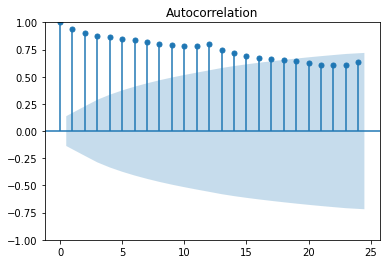

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plot_acf(df_vst) 


#### 로그 후 편자기상관성 보여주기

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


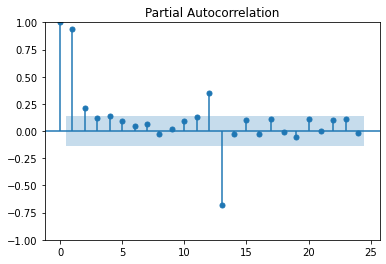

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plot_pacf(df_vst) 

##  차분 첫번째 후


In [10]:
## De-trend by Differencing
df_vst_diff1=df_vst.diff(1).dropna()
df_vst_diff1

date
1991-08-01   -0.103170
1991-09-01    0.022177
1991-10-01    0.104647
1991-11-01   -0.012578
1991-12-01    0.188688
                ...   
2008-02-01   -0.314777
2008-03-01   -0.170220
2008-04-01    0.235181
2008-05-01   -0.008482
2008-06-01   -0.164775
Name: value, Length: 203, dtype: float64

<AxesSubplot:xlabel='date'>

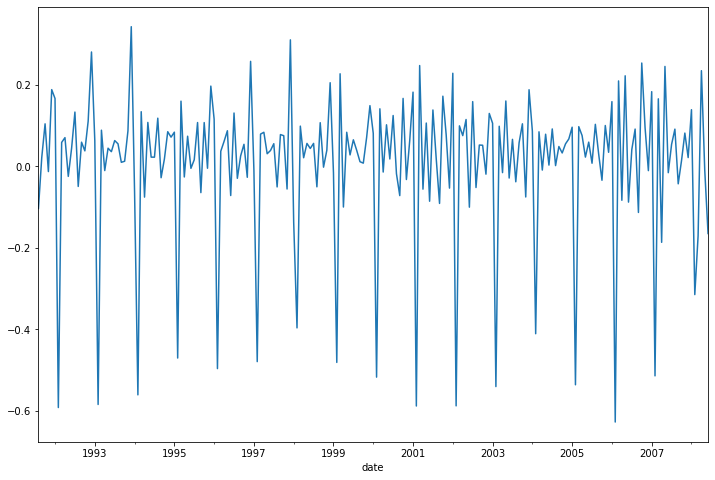

In [11]:
plt.figure(figsize=(12,8))
df_vst_diff1.plot()

#### 첫 차분 후 자기상관성 보여주기

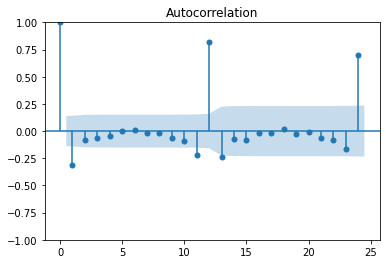

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plot_acf(df_vst_diff1) 

#### 첫 차분 후 편자기상관성 보여주기

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


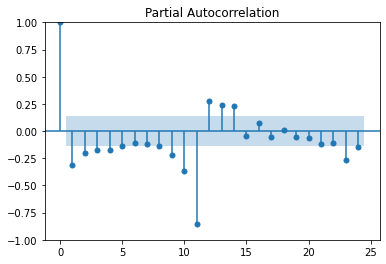

In [28]:

fig=plot_pacf(df_vst_diff1) 

## 차분 두번째 후

In [12]:
## Stationary Process : De-seansonlity by Seasonal Differencing
df_vst_diff1_diff12=df_vst_diff1.diff(12).dropna()


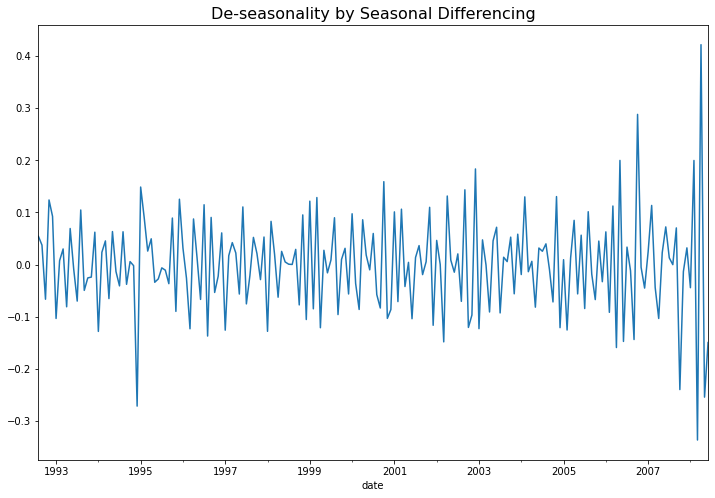

In [15]:
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing",fontsize=16)
plt.show()

#### 두번째 차분 후 자기상관성 보여주기

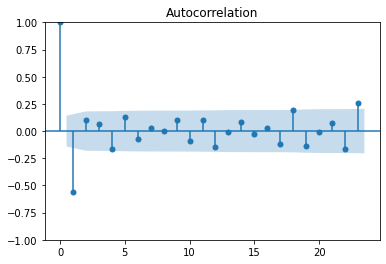

In [29]:
fig=plot_acf(df_vst_diff1_diff12)

#### 두번째 차분 후 편자기상관성 보여주기

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


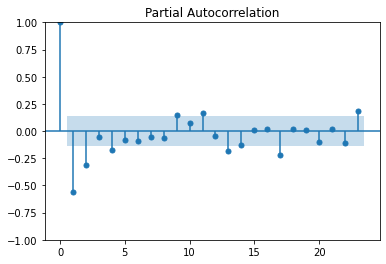

In [30]:
fig=plot_pacf(df_vst_diff1_diff12)